In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats._continuous_distns import _distn_names

In [2]:
o_cols = ['FTR', 'AvgH', 'AvgA', 'AvgD']

For epl
quantile 1.4685
metric 1.07
DescribeResult(nobs=760, minmax=(1.07, 21.61), mean=2.975407894736842, variance=3.835364523784758, skewness=3.399376543310549, kurtosis=19.482947166818523)


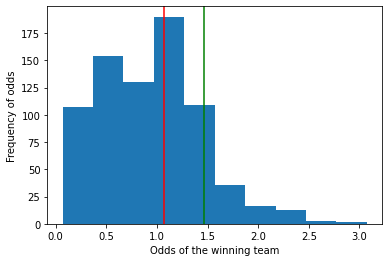

For de
quantile 1.4781499999999999
metric 1.06
DescribeResult(nobs=612, minmax=(1.06, 23.32), mean=2.898937908496732, variance=3.2079505886096933, skewness=3.8313714631262914, kurtosis=30.724637770167284)


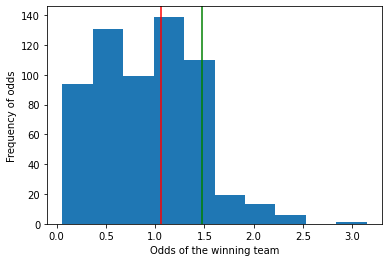

For it
quantile 1.35
metric 1.14
DescribeResult(nobs=760, minmax=(1.14, 15.04), mean=2.780171052631579, variance=2.594157941716941, skewness=2.8962274667606267, kurtosis=15.008331328036238)


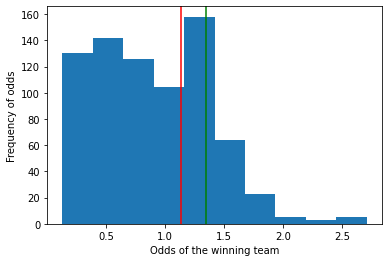

In [16]:
for q, league in [(0.15, 'epl'), (0.165, 'de'), (0.1, 'it')]:
    print(f"For {league}")
    df = pd.read_csv(f'{league}_odds_2021.csv')
    df = df.filter(o_cols)
    df_train = pd.concat(map(pd.read_csv, [f'{league}_odds_2019.csv', f'{league}_odds_2020.csv']), ignore_index=True)
    df_train = df_train.filter(o_cols)
    
    ideal_odds = np.zeros(len(df_train))
    for i, row in df_train.iterrows():
        ideal_odds[i] = row['Avg'+row['FTR']]

    plt.hist(np.log(ideal_odds))
    plt.xlabel("Odds of the winning team")
    plt.ylabel("Frequency of odds")
    
    #metric = np.quantile(ideal_odds, 0.1*(np.mean(ideal_odds)/np.var(ideal_odds) + scipy.stats.skew(ideal_odds)/len(ideal_odds)))
    #moment = scipy.stats.moment(ideal_odds, moment=3)
    #metric = np.quantile(ideal_odds, np.var(ideal_odds)*1/moment*np.max(ideal_odds)/np.sum(ideal_odds))
    moment = scipy.stats.moment(ideal_odds, moment=1)
    #metric = np.quantile(ideal_odds, moment**2*np.max(ideal_odds)/np.sum(ideal_odds))
    metric = np.quantile(ideal_odds, moment*(np.max(ideal_odds) - np.min(ideal_odds))/np.max(ideal_odds))
    plt.axvline(metric, c='r')
    
    plt.axvline(np.quantile(ideal_odds, q), c='g')
    print(f"quantile {np.quantile(ideal_odds, q)}")
    print(f"metric {metric}")
    print(scipy.stats.describe(ideal_odds))
    plt.show()

    scipy.stats.describe(ideal_odds)
    